# Bootstrap

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from pathlib import Path

import scipy as sc
import math
import statistics
import numpy as np
import scipy.special as scp
import scipy.constants
import seaborn as sns
import scipy.integrate as spi

In [2]:
import numpy as np
import random

In [3]:
from Free_energy_estimators.Utils import extract_list_work, Convert_kJ_kcal, Convert_list
from Free_energy_estimators.Jarzynski import Jarzyinski_function
from Free_energy_estimators.BAR_algorithm import bennett

In [4]:
### constants ###
T = 298
kb = sc.constants.Boltzmann # 1.380649e-23 J
Na = sc.constants.Avogadro # 6.02214076e+23 mol-1
kbT_kJ_mol = kb*0.001*Na*T
beta = (1/(kbT_kJ_mol))
toll = 1e-6 

# 150 ns

# Jarzkynski functions

In [5]:
### bootrstap_randomize used in bootstrap_Jarzynski_binding_energy and bootstrap_BAR_binding_energy_test ###
### randomize two list of work values ###
def bootstrap_randomize(list_work):
    vector = []
    randomized_list = []
    for i in range(0,len(list_work)):
        vector.append(random.randint(0, len(list_work)-1))
        randomized_list=[list_work[x] for x in vector]
    return randomized_list

In [12]:
### calculate the bootstrap binding energy for Jarzynski estimator ### 
def bootstrap_Jarzynski_binding_energy(i, start, stop, step, n_bootstrap_sampling, wdir, name_file, discrim_frame, invert):
    s_list = range(start,stop,step)
    Free_Energy_Binding_list = []
    for n in range(0, n_bootstrap_sampling):
        PMF_list = []
        for s in range(start,stop,step):
            file = f'{wdir}/{name_file}{s}'
            work_list = extract_list_work(file, 'work_list')
            #print(work_list)
            randomized_list = bootstrap_randomize(list_work=work_list)[:i+1]
            #print(randomized_list)
            PMF_list.append(Jarzyinski_function(list_work=randomized_list, invert=invert))

        x = [(i-min(s_list))/(max(s_list)-min(s_list)) for i in s_list]
        y = np.exp(-beta*np.array(PMF_list))
        
        if invert == False:
            bound_region = spi.simpson(y[:discrim_frame],x[:discrim_frame])
            unbound_region = spi.simpson(y[discrim_frame:],x[discrim_frame:])
        if invert == True:
            unbound_region = spi.simpson(y[:discrim_frame],x[:discrim_frame])
            bound_region = spi.simpson(y[discrim_frame:],x[discrim_frame:])
        Free_Energy_Binding = -1/beta*np.log(bound_region/unbound_region) 
        Free_Energy_Binding_list.append(Free_Energy_Binding)
    return np.mean(Free_Energy_Binding_list), np.std(Free_Energy_Binding_list)

# Jarzyinski - unbinding

In [7]:
####################################################
###INPUTS - INFO ABOUT SIMULATIONS PERFORMED###
#time of simulation
sim_time = 150

#type of simulation (binding or unbinding)
simulation = 'unbinding'

#number of bootstrap sampling to be performed
n_bootstrap_sampling = 400

#number of simulation replicas performed
replicas = 50

#initial and final values of s (PCV)
initial_s = 3
final_s = 45

#frame discriminating between the bound and unbound region
discrim_frame=10
##################################################

In [8]:
#define work directories and name of files (usally not to be modified)
wdir = '/Users/alessiaghidini/Desktop/steered_md_on_predetermined_pcvs/steered-md'
name_file = 'cb8-g8/unbinding-%dns/work_different_s_time/work_s_'%sim_time


#define start, stop, and step values of s (PCV)
start = initial_s
stop = final_s+1
step = +1

invert = False

### Define number of bootstrap sampling

[-15.831277432864283]
[-15.831277432864283, -15.88534366499745]
[-15.831277432864283, -15.88534366499745, -15.755045628250796]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -1

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037]
[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.8

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

[-15.831277432864283, -15.88534366499745, -15.755045628250796, -15.79336628021433, -15.76812112942842, -15.809120674820402, -15.847938160244327, -15.805650922063709, -15.766810474788015, -15.794614191116784, -15.766810394023617, -15.7991019315328, -15.79753470325874, -15.747420366653218, -15.769625688656394, -15.801208561165158, -15.798734648180869, -15.802764483863307, -15.804393020884389, -15.792423139787019, -15.80365842623004, -15.794718293002216, -15.764614817236973, -15.79180330402746, -15.781800082570879, -15.772141791721282, -15.809986680575632, -15.77769362339082, -15.806538338622767, -15.809123054497203, -15.765446267883853, -15.798271767017619, -15.812918735690806, -15.79976295663882, -15.801576184033738, -15.813452517706912, -15.781103640830269, -15.816131445243172, -15.7732237447429, -15.777674029009937, -15.775048535375037, -15.793337092665668, -15.790622220702234, -15.789434738863644, -15.78365726005234, -15.782844890322446, -15.787586359615842, -15.80188008083816, -15.7

<ErrorbarContainer object of 3 artists>

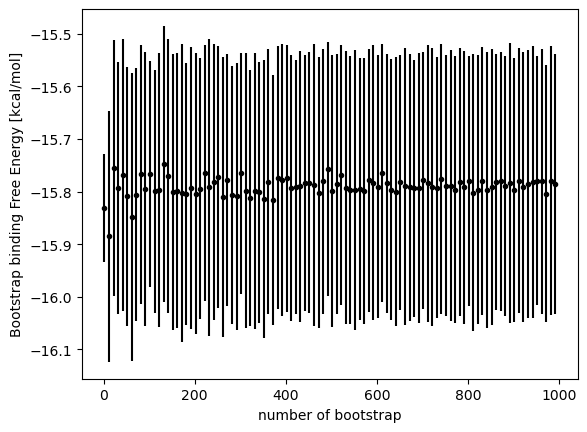

In [68]:
n_bootstrap_sampling = 1000
mu_tot = []
sigma_tot = []
for num_boot in range(2,n_bootstrap_sampling,10):
    mu, sigma = bootstrap_Jarzynski_binding_energy(i=replicas,
                                               start=start,
                                               stop=stop,
                                               step=step,
                                               n_bootstrap_sampling=num_boot,
                                               wdir=wdir,
                                               name_file=name_file,
                                               discrim_frame=discrim_frame,
                                               invert=invert
                                               )
    mu_tot.append(mu)
    sigma_tot.append(sigma)
    print(mu_tot)

y = mu_tot
yerr = sigma_tot
x_list= list(range(2,n_bootstrap_sampling,10))
x = np.array(x_list)

plt.xlabel('number of bootstrap')
plt.ylabel('Bootstrap binding Free Energy [kcal/mol]')
plt.errorbar(x, y, yerr, fmt='.k')

## Bootstrap error

In [9]:
mu, sigma = bootstrap_Jarzynski_binding_energy(i=replicas,
                                               start=start,
                                               stop=stop,
                                               step=step,
                                               n_bootstrap_sampling=n_bootstrap_sampling,
                                               wdir=wdir,
                                               name_file=name_file,
                                               discrim_frame=discrim_frame,
                                               invert=invert
                                               )
print(f'binding free energy (kcal/mol): {mu} +/- {3*sigma}')

binding free energy (kcal/mol): -15.787554550096834 +/- 0.7560313249441424


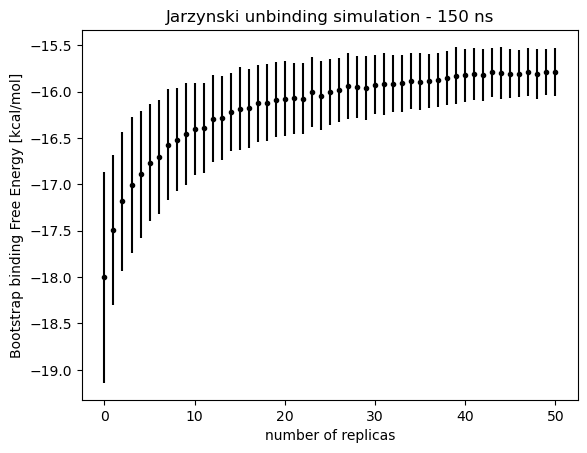

In [10]:
y_mean, y_std = zip(*[bootstrap_Jarzynski_binding_energy(i,
                                                        start=start,
                                                        stop=stop,
                                                        step=step,
                                                        n_bootstrap_sampling=400,
                                                        wdir=wdir,
                                                        name_file=name_file,
                                                        discrim_frame=discrim_frame,
                                                        invert=invert) for i in range(replicas+1)])

plt.xlabel('number of replicas')
plt.ylabel('Bootstrap binding Free Energy [kcal/mol]')
plt.errorbar(np.arange(replicas+1), y_mean, yerr=y_std, fmt='.k')
plt.title('Jarzynski unbinding simulation - 150 ns')
plt.savefig(f'Bootstrap_Jarzynski_unbinding_{sim_time}.png') 

plt.show()

# Jarzyinski - binding

In [13]:
####################################################
###INPUTS - INFO ABOUT SIMULATIONS PERFORMED###
#time of simulation
sim_time = 150

#type of simulation (binding or unbinding)
simulation = 'binding'

#number of bootstrap sampling to be performed
n_bootstrap_sampling = 400

#number of simulation replicas performed
replicas = 50

#initial and final values of s (PCV)
initial_s = 3
final_s = 45

#frame discriminating between the bound and unbound region
discrim_frame=10
##################################################

In [14]:
#define work directories and name of files (usally not to be modified)
wdir = '/Users/alessiaghidini/Desktop/steered_md_on_predetermined_pcvs/steered-md'
name_file = 'cb8-g8/binding-%dns/work_different_s_time/work_s_'%sim_time


#if invert = True, then values of final_s and initial_s are inverted
invert = True

#inversion of final and initial values of s (default for binding simulations)
if (invert == True):
    t = final_s
    final_s = initial_s
    initial_s = t
    
    start = final_s
    stop = initial_s-1
    step = -1

##################################################

### Define number of bootstrap sampling

<ErrorbarContainer object of 3 artists>

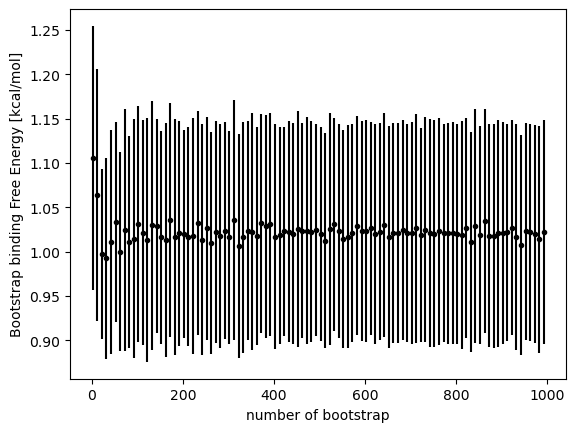

In [21]:
n_bootstrap_sampling = 1000
mu_tot = []
sigma_tot = []
for num_boot in range(2,n_bootstrap_sampling,10):
    mu, sigma = bootstrap_Jarzynski_binding_energy(i=replicas,
                                               start=start,
                                               stop=stop,
                                               step=step,
                                               n_bootstrap_sampling=n_bootstrap_sampling,
                                               wdir=wdir,
                                               name_file=name_file,
                                               discrim_frame=discrim_frame,
                                               invert=invert
                                               )
    mu_tot.append(mu)
    sigma_tot.append(sigma)

y = mu_tot
yerr = sigma_tot
x_list= list(range(2,n_bootstrap_sampling,10))
x = np.array(x_list)

plt.xlabel('number of bootstrap')
plt.ylabel('Bootstrap binding Free Energy [kcal/mol]')
plt.errorbar(x, y, yerr, fmt='.k')

## Bootstrap error

In [15]:
mu, sigma = bootstrap_Jarzynski_binding_energy(i=replicas,
                                               start=45,
                                               stop=2,
                                               step=-1,
                                               n_bootstrap_sampling=400,
                                               wdir=wdir,
                                               name_file=name_file,
                                               discrim_frame=discrim_frame,
                                               invert=True,
                                               )
print(f'binding free energy (kcal/mol): {mu} +/- {3*sigma}')

binding free energy (kcal/mol): -16.299306743952968 +/- 0.36601997406471476


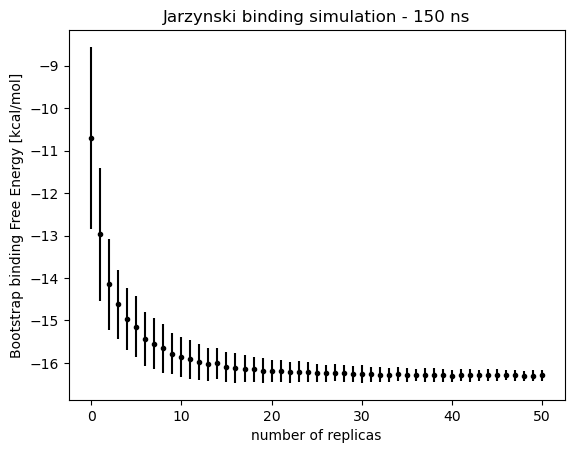

In [16]:
y_mean, y_std = zip(*[bootstrap_Jarzynski_binding_energy(i,
                                                        start=45,
                                                        stop=2,
                                                        step=-1,
                                                        n_bootstrap_sampling=400,
                                                        wdir=wdir,
                                                        name_file=name_file,
                                                        discrim_frame=discrim_frame,
                                                        invert=True) for i in range(replicas+1)])

plt.xlabel('number of replicas')
plt.ylabel('Bootstrap binding Free Energy [kcal/mol]')
plt.errorbar(np.arange(replicas+1), y_mean, yerr=y_std, fmt='.k')
plt.title('Jarzynski binding simulation - 150 ns')
plt.savefig(f'Bootstrap_Jarzynski_binding_{sim_time}.png') 

plt.show()

# Crooks functions

In [17]:
### double_bootrstap_randomize used in bootstrap_BAR_binding_energy ###
### randomize two list of work values ###
def double_bootstrap_randomize(list_work1, list_work2):
    vector1 = []
    vector2 = []
    randomized_list_1 = []
    randomized_list_2 = []
    for i in range(0,len(list_work1)):
        vector1.append(random.randint(0, len(list_work1)-1))
        randomized_list_1=[list_work1[x] for x in vector1]
    for i in range(0,len(list_work2)):
        vector2.append(random.randint(0, len(list_work2)-1))
        randomized_list_2=[list_work2[x] for x in vector2]
    return randomized_list_1,randomized_list_2

In [18]:
### calculate the bootstrap binding energy for BAR estimator ### 
def bootstrap_BAR_binding_energy(i, start, stop, step, n_bootstrap_sampling, wdir, name_file_binding, name_file_unbinding, discrim_frame):
    s_list = range(start,stop,step)
    Free_Energy_Binding_list = []

    for n in range(0,n_bootstrap_sampling):
        PMF_list = []
        for s in range(start,stop,step):
            work_unbind_list = extract_list_work(f'{wdir}/{name_file_unbinding}{s}', 'work_bind_list')
            work_bind_list = Convert_list(extract_list_work(f'{wdir}/{name_file_binding}{s}', 'work_unbind_list'))
            v0 = np.array(work_unbind_list) #forward W: unbinding 
            v1 = np.array(work_bind_list) #backward W: binding 
            randomized_list_1, randomized_list_2 = double_bootstrap_randomize(list_work1=v0, list_work2=v1)
            randomized_list_1 = np.array(randomized_list_1)[:i+1]
            randomized_list_2 = np.array(randomized_list_2)[:i+1]
            PMF = (1/beta)*bennett(randomized_list_1,randomized_list_2,T)
            PMF_list.append(Convert_kJ_kcal(PMF))

        x = [(i-min(s_list))/(max(s_list)-min(s_list)) for i in s_list]
        y = np.exp(-beta*np.array(PMF_list))
        bound_region = spi.simpson(y[:discrim_frame],x[:discrim_frame])
        unbound_region = spi.simpson(y[discrim_frame:],x[discrim_frame:])
        Free_Energy_Binding = -1/beta*np.log(bound_region/unbound_region) 
        Free_Energy_Binding_list.append(Free_Energy_Binding)
    return np.mean(Free_Energy_Binding_list), np.std(Free_Energy_Binding_list)

In [19]:
####################################################
###INPUTS - INFO ABOUT SIMULATIONS PERFORMED###
#time of simulation
sim_time = 150

#number of bootstrap sampling to be performed
n_bootstrap_sampling = 400

#number of simulation replicas performed
replicas = 50

#initial and final values of s (PCV)
initial_s = 3
final_s = 45

#frame discriminating between the bound and unbound region
discrim_frame=10
##################################################

In [20]:
#define work directories and name of files (usally not to be modified)
wdir = '/Users/alessiaghidini/Desktop/steered_md_on_predetermined_pcvs/steered-md'
name_file_unbinding = 'cb8-g8/unbinding-%dns/work_different_s_time/work_s_'%sim_time
name_file_binding = 'cb8-g8/binding-%dns/work_different_s_time/work_s_'%sim_time


#define start, stop, and step values of s (PCV)
start = initial_s
stop = final_s+1
step = +1

### Define number of bootstrap sampling

<ErrorbarContainer object of 3 artists>

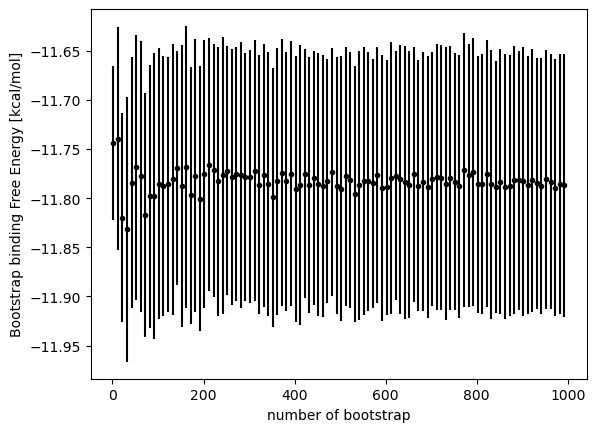

In [69]:
n_bootstrap_sampling = 1000
mu_tot = []
sigma_tot = []
for num_boot in range(2,n_bootstrap_sampling,10):
    mu, sigma = bootstrap_BAR_binding_energy(i=replicas,
                                               start=start,
                                               stop=stop,
                                               step=step,
                                               n_bootstrap_sampling=num_boot,
                                               wdir=wdir,
                                               name_file_binding=name_file_binding,
                                               name_file_unbinding=name_file_unbinding,
                                               discrim_frame=discrim_frame,
                                               invert=invert
                                               )
    mu_tot.append(mu)
    sigma_tot.append(sigma)

y = mu_tot
yerr = sigma_tot
x_list= list(range(2,n_bootstrap_sampling,10))
x = np.array(x_list)

plt.xlabel('number of bootstrap')
plt.ylabel('Bootstrap binding Free Energy [kcal/mol]')
plt.errorbar(x, y, yerr, fmt='.k')

## Bootstrap error

In [21]:
mu, sigma = bootstrap_BAR_binding_energy(i=replicas,
                                               start=start,
                                               stop=stop,
                                               step=step,
                                               n_bootstrap_sampling=400,
                                               wdir=wdir,
                                               name_file_binding=name_file_binding,
                                               name_file_unbinding=name_file_unbinding,
                                               discrim_frame=discrim_frame
                                               )
print(f'binding free energy (kcal/mol): {mu} +/- {3*sigma}')

binding free energy (kcal/mol): -13.92334016717615 +/- 0.4085368295521048


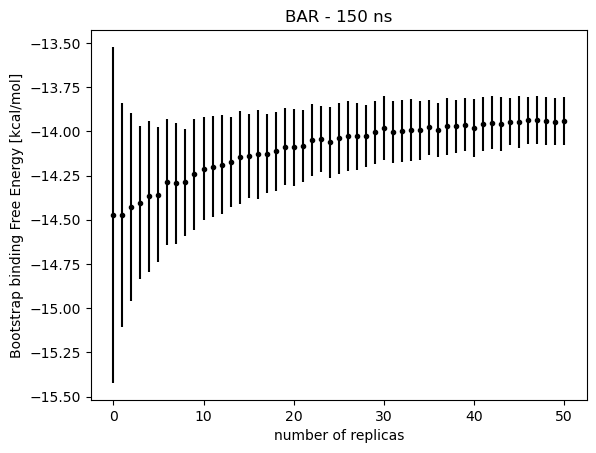

In [22]:
y_mean, y_std = zip(*[bootstrap_BAR_binding_energy(i,
                                                        start=start,
                                                        stop=stop,
                                                        step=step,
                                                        n_bootstrap_sampling=400,
                                                        wdir=wdir,
                                                        name_file_binding=name_file_binding,
                                                        name_file_unbinding=name_file_unbinding,
                                                        discrim_frame=discrim_frame) for i in range(replicas+1)])

plt.xlabel('number of replicas')
plt.ylabel('Bootstrap binding Free Energy [kcal/mol]')
plt.errorbar(np.arange(replicas+1), y_mean, yerr=y_std, fmt='.k')
plt.title('BAR - 150 ns')
plt.savefig(f'Bootstrap_BAR_{sim_time}.png') 

plt.show()